In [297]:
import matplotlib.pyplot as plt
import sys
import re
sys.path.insert(0, "../modules")
import numpy as np
import seaborn as sns
import duckdb
import pandas as pd
import plotly.express as px
import cufflinks as cf
cf.go_offline()
import statistics
from functools import reduce

## Importo el archivo con duckdb

In [3]:
diamonds = duckdb.connect('./data/diamonds_train.db')
diamonds

In [421]:
diamonds.sql('DESCRIBE')

┌──────────────────────┬───────────────────────────────┬───────────────────────────────────────────────────┬───────────┐
│      table_name      │         column_names          │                   column_types                    │ temporary │
│       varchar        │           varchar[]           │                     varchar[]                     │  boolean  │
├──────────────────────┼───────────────────────────────┼───────────────────────────────────────────────────┼───────────┤
│ diamonds_city        │ [city_id, city]               │ [VARCHAR, VARCHAR]                                │ false     │
│ diamonds_clarity     │ [clarity_id, clarity]         │ [VARCHAR, VARCHAR]                                │ false     │
│ diamonds_color       │ [color_id, color]             │ [VARCHAR, VARCHAR]                                │ false     │
│ diamonds_cut         │ [cut_id, cut]                 │ [VARCHAR, VARCHAR]                                │ false     │
│ diamonds_dimensions  │ [index_

## Registro tablas y transformo a df

In [428]:
tabla = diamonds.sql('describe').df()
tabla

,table_name,column_names,column_types,temporary
0,diamonds_city,"[city_id, city]","[VARCHAR, VARCHAR]",False
1,diamonds_clarity,"[clarity_id, clarity]","[VARCHAR, VARCHAR]",False
2,diamonds_color,"[color_id, color]","[VARCHAR, VARCHAR]",False
3,diamonds_cut,"[cut_id, cut]","[VARCHAR, VARCHAR]",False
4,diamonds_dimensions,"[index_id, depth, table, x, y, z]","[VARCHAR, DOUBLE, DOUBLE, DOUBLE, DOUBLE, DOUBLE]",False
5,diamonds_properties,"[index_id, cut_id, color_id, clarity_id]","[VARCHAR, VARCHAR, VARCHAR, VARCHAR]",False
6,diamonds_transactional,"[index_id, price, city_id, carat]","[VARCHAR, BIGINT, VARCHAR, DOUBLE]",False


In [423]:
tabla_1 = diamonds.sql('SELECT * from diamonds_city').df()
tabla_1

,city_id,city
0,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam
1,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,Zurich
2,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,Las Vegas
3,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,New York City
4,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,Paris
5,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,Tel Aviv
6,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai
7,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly
8,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,Surat
9,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,Antwerp


In [470]:
tabla_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   city_id  13 non-null     object
 1   city     13 non-null     object
dtypes: object(2)
memory usage: 336.0+ bytes


In [471]:
tabla_2 = diamonds.sql('SELECT * from diamonds_clarity').df()
tabla_2

,clarity_id,clarity
0,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2
1,3f9db06236e9719b61c826b612b882fa702ec81574e44c...,VVS2
2,66686ae1f0c9c400ba32dc600a34ff0aa173395bcbc2d8...,VVS1
3,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,IF
4,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,SI1
5,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1
6,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,VS1
7,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2


In [472]:
tabla_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clarity_id  8 non-null      object
 1   clarity     8 non-null      object
dtypes: object(2)
memory usage: 256.0+ bytes


In [473]:
tabla_3 = diamonds.sql('SELECT * from diamonds_color').df()
tabla_3

,color_id,color
0,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G
1,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,D
2,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,H
3,6da43b944e494e885e69af021f93c6d9331c78aa228084...,J
4,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...,I
5,a9f51566bd6705f7ea6ad54bb9deb449f795582d6529a0...,E
6,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,F


In [474]:
tabla_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   color_id  7 non-null      object
 1   color     7 non-null      object
dtypes: object(2)
memory usage: 240.0+ bytes


In [475]:
tabla_4 = diamonds.sql('SELECT * from diamonds_cut').df()
tabla_4

,cut_id,cut
0,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,Very Good
1,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,Ideal
2,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,Good
3,de88c121a82a06352bf1aaceba20578356408a334ba046...,Premium
4,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,Fair


In [476]:
tabla_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cut_id  5 non-null      object
 1   cut     5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [477]:
tabla_5 = diamonds.sql('SELECT * from diamonds_dimensions').df()
tabla_5

,index_id,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95
...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76


In [478]:
tabla_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index_id  40455 non-null  object 
 1   depth     40455 non-null  float64
 2   table     40455 non-null  float64
 3   x         40455 non-null  float64
 4   y         40455 non-null  float64
 5   z         40455 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.9+ MB


In [479]:
tabla_6 = diamonds.sql('SELECT * from diamonds_properties').df()
tabla_6

,index_id,cut_id,color_id,clarity_id
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...


In [480]:
tabla_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index_id    40455 non-null  object
 1   cut_id      40455 non-null  object
 2   color_id    40455 non-null  object
 3   clarity_id  40455 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [481]:
tabla_7 = diamonds.sql('SELECT * from diamonds_transactional').df()
tabla_7

,index_id,price,city_id,carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,89c7286890f7347ab235234e74d406596a127ae3679042...,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,89c7286890f7347ab235234e74d406596a127ae3679042...,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02
...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,1.34
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,2.02
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,89c7286890f7347ab235234e74d406596a127ae3679042...,1.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,89c7286890f7347ab235234e74d406596a127ae3679042...,0.33


In [482]:
tabla_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index_id  40455 non-null  object 
 1   price     40455 non-null  int64  
 2   city_id   40455 non-null  object 
 3   carat     40455 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ MB


## Merge de los dataframes

In [483]:
#Primero hacemos merge de la tabla 2, 3 y 4 con la tabla 6. 

In [503]:
tabla_price = pd.merge(tabla_5, tabla_7, how='inner', on = 'index_id')
tabla_price[:5]

,index_id,depth,table,x,y,z,price,city_id,carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75,505,89c7286890f7347ab235234e74d406596a127ae3679042...,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65,2686,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00,738,89c7286890f7347ab235234e74d406596a127ae3679042...,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02


In [507]:
tabla_city = pd.merge(tabla_price, tabla_1, how='inner', on = 'city_id')
tabla_city[:5]

,index_id,depth,table,x,y,z,price,city_id,carat,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,Dubai
1,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,Dubai
2,76a50887d8f1c2e9301755428990ad81479ee21c25b432...,61.3,59.0,8.13,8.09,4.97,14208,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,2.00,Dubai
3,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,63.7,60.0,6.32,6.28,4.01,5113,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.01,Dubai
4,3ada92f28b4ceda38562ebf047c6ff05400d4c572352a1...,62.3,57.0,5.90,5.85,3.66,2898,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,0.79,Dubai


In [508]:
tabla_ids = pd.merge(tabla_city, tabla_6, how='inner', on = 'index_id')
tabla_ids[:5]

,index_id,depth,table,x,y,z,price,city_id,carat,city,cut_id,color_id,clarity_id
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
1,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,Dubai,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
2,76a50887d8f1c2e9301755428990ad81479ee21c25b432...,61.3,59.0,8.13,8.09,4.97,14208,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,2.00,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...
3,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,63.7,60.0,6.32,6.28,4.01,5113,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.01,Dubai,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
4,3ada92f28b4ceda38562ebf047c6ff05400d4c572352a1...,62.3,57.0,5.90,5.85,3.66,2898,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,0.79,Dubai,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...


In [509]:
tabla_clar = pd.merge(tabla_ids, tabla_2, how='inner', on = 'clarity_id')
tabla_clar[:5]

,index_id,depth,table,x,y,z,price,city_id,carat,city,cut_id,color_id,clarity_id,clarity
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2
1,5426d2ca50f244fb43fe9eafc82da08f33f3b4f8d91408...,60.1,55.0,7.01,6.91,4.18,8870,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2
2,e6f47e008cc58b38596e6fdf2f50a0fea93fd10543e652...,62.5,55.0,5.73,5.70,3.57,2693,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,0.70,Dubai,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,a9f51566bd6705f7ea6ad54bb9deb449f795582d6529a0...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2
3,a05198938c6ca8cd56289c6dba6bb8aaa68dfe8e0d7a37...,62.3,59.0,7.29,7.34,4.56,14112,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.51,Dubai,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2
4,af5422f824076084bed9b8a09086ac59f0ed8c74eea7b1...,62.3,58.0,6.82,6.79,4.24,5962,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2


In [510]:
tabla_color = pd.merge(tabla_clar, tabla_3, how='inner', on = 'color_id')
tabla_color[:5]

,index_id,depth,table,x,y,z,price,city_id,carat,city,cut_id,color_id,clarity_id,clarity,color
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J
1,35041ec21b0be43fcc811118982e23e71df122c6732578...,67.4,58.0,5.34,5.37,3.61,1896,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,0.70,Dubai,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J
2,41667f6e2629360aecaf00b20f8732e3310417ebd54b24...,61.6,58.0,6.40,6.35,3.93,3513,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J
3,7ee3819bf62f7e4563a2a9476df6e18a6cd17cceb30b92...,61.9,58.0,5.35,5.38,3.32,1287,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,0.59,Dubai,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J
4,42e544025f96e6ee0a064873a7f2d431ca555ed0ab1f29...,63.1,61.0,7.19,7.23,4.55,6982,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.52,Dubai,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J


In [511]:
tabla_final = pd.merge(tabla_color, tabla_4, how='inner', on = 'cut_id')
tabla_final[:5]

,index_id,depth,table,x,y,z,price,city_id,carat,city,cut_id,color_id,clarity_id,clarity,color,cut
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J,Premium
1,41667f6e2629360aecaf00b20f8732e3310417ebd54b24...,61.6,58.0,6.40,6.35,3.93,3513,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J,Premium
2,01f8667f50d52677bea23231a74156e4f92360d7bc3db6...,62.3,58.0,5.86,5.80,3.63,1792,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,0.77,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J,Premium
3,c3867352aab641358faec75d733af012dbe2259a014ea8...,59.6,60.0,7.58,7.48,4.49,7553,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.51,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J,Premium
4,0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...,60.2,62.0,5.40,5.33,3.23,1176,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,0.57,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J,Premium


In [360]:
#Este es el dataframe final que utilizaré

## Registro las variables 

In [517]:
# NUMERICAL VARIABLES
numerical = tabla_final.select_dtypes(include=['float64', 'int64'])
numerical

,depth,table,x,y,z,price,carat
0,62.4,58.0,6.83,6.79,4.25,4268,1.21
1,61.6,58.0,6.40,6.35,3.93,3513,1.02
2,62.3,58.0,5.86,5.80,3.63,1792,0.77
3,59.6,60.0,7.58,7.48,4.49,7553,1.51
4,60.2,62.0,5.40,5.33,3.23,1176,0.57
...,...,...,...,...,...,...,...
40450,59.5,57.0,5.46,5.42,3.24,1019,0.57
40451,63.2,55.0,7.21,7.18,4.54,6096,1.44
40452,61.2,56.0,6.47,6.50,3.97,3459,1.02
40453,61.6,57.0,6.93,6.96,4.28,4428,1.28


In [516]:
# CATEGORICAL VARIABLES
categorical = tabla_final.select_dtypes(include=['object'])
categorical

,index_id,city_id,city,cut_id,color_id,clarity_id,clarity,color,cut
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J,Premium
1,41667f6e2629360aecaf00b20f8732e3310417ebd54b24...,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J,Premium
2,01f8667f50d52677bea23231a74156e4f92360d7bc3db6...,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J,Premium
3,c3867352aab641358faec75d733af012dbe2259a014ea8...,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J,Premium
4,0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J,Premium
...,...,...,...,...,...,...,...,...,...
40450,bea9578e68f03a0f5c3024f36654a3e62f69dfbfae5ac1...,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,Surat,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1,G,Ideal
40451,dc662be7c5ce89f50d4f21a3ff4f8b04306cf9a0959f40...,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1,G,Ideal
40452,9f90939733141558c070ceb7204edeb3879a668ee01244...,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1,G,Ideal
40453,d1a67d0a066910e96669c44b980f881d3ff7aa11d9485e...,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,Luxembourg,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1,G,Ideal


## Numerical variables

In [515]:
tabla_final.describe()

,depth,table,x,y,z,price,carat
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,61.752841,57.446133,5.729392,5.732819,3.537154,3928.444469,0.797706
std,1.431725,2.233535,1.124453,1.146650,0.697062,3992.416147,0.475544
min,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000,0.200000
25%,61.000000,56.000000,4.710000,4.720000,2.910000,945.000000,0.400000
50%,61.800000,57.000000,5.690000,5.710000,3.520000,2397.000000,0.700000
75%,62.500000,59.000000,6.540000,6.540000,4.035000,5331.000000,1.040000
max,79.000000,95.000000,10.230000,58.900000,8.060000,18823.000000,4.500000


In [336]:
tabla_final['carat'] = tabla_final['carat'].astype(float)

## Categorical variables

In [514]:
tabla_final

,index_id,depth,table,x,y,z,price,city_id,carat,city,cut_id,color_id,clarity_id,clarity,color,cut
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J,Premium
1,41667f6e2629360aecaf00b20f8732e3310417ebd54b24...,61.6,58.0,6.40,6.35,3.93,3513,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J,Premium
2,01f8667f50d52677bea23231a74156e4f92360d7bc3db6...,62.3,58.0,5.86,5.80,3.63,1792,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,0.77,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J,Premium
3,c3867352aab641358faec75d733af012dbe2259a014ea8...,59.6,60.0,7.58,7.48,4.49,7553,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.51,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J,Premium
4,0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...,60.2,62.0,5.40,5.33,3.23,1176,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,0.57,Dubai,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2,J,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,bea9578e68f03a0f5c3024f36654a3e62f69dfbfae5ac1...,59.5,57.0,5.46,5.42,3.24,1019,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,0.57,Surat,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1,G,Ideal
40451,dc662be7c5ce89f50d4f21a3ff4f8b04306cf9a0959f40...,63.2,55.0,7.21,7.18,4.54,6096,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,1.44,Luxembourg,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1,G,Ideal
40452,9f90939733141558c070ceb7204edeb3879a668ee01244...,61.2,56.0,6.47,6.50,3.97,3459,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,1.02,Luxembourg,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1,G,Ideal
40453,d1a67d0a066910e96669c44b980f881d3ff7aa11d9485e...,61.6,57.0,6.93,6.96,4.28,4428,ed76f191621cf6ed77eab6a8013d1cb4bdfa89a75a24aa...,1.28,Luxembourg,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1,G,Ideal


In [525]:
color = tabla_final['color'].value_counts()
color

G    8455
E    7325
F    7177
H    6277
D    5049
I    4032
J    2140
Name: color, dtype: int64

## EDA

([<matplotlib.patches.Wedge at 0x7f895f465ee0>,
 [Text(0.3368300493142049, 1.0471606934367765, 'Ideal'),
  Text(-1.083325583275571, -0.19080272697381426, 'Premium'),
  Text(0.11702008124276615, -1.093757880239469, 'Very Good'),
  Text(0.9789898117189734, -0.5015764633138693, 'Good'),
  Text(1.0950911994147756, -0.10380397374045118, 'Fair')],
 [Text(0.18372548144411174, 0.5711785600564234, '40%'),
  Text(-0.590904863604857, -0.1040742147129896, '25%'),
  Text(0.06382913522332698, -0.5965952074033467, '22%'),
  Text(0.5339944427558035, -0.27358716180756504, '9%'),
  Text(0.5973224724080594, -0.05662034931297336, '3%')])

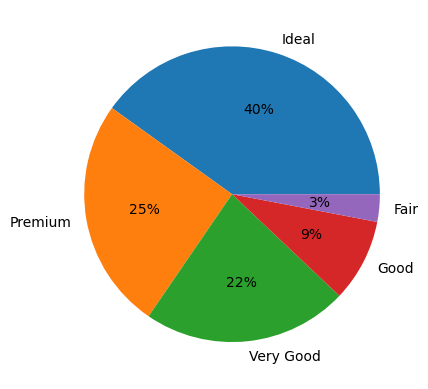

In [526]:
cut_analysis = categorical.cut.value_counts()
plt.pie(cut_analysis, labels=cut_analysis.index, autopct='%1.0f%%')

([<matplotlib.patches.Wedge at 0x7f892dd064f0>,
 [Text(0.8712892288151466, 0.6714574295893281, 'G'),
  Text(-0.33683004931420485, 1.0471606934367765, 'E'),
  Text(-1.0902249256486127, 0.14632023610723527, 'F'),
  Text(-0.6739243603605065, -0.8693825144967446, 'H'),
  Text(0.24017848049058696, -1.0734590339222234, 'D'),
  Text(0.8786918089067258, -0.6617406629188101, 'I'),
  Text(1.084845353687348, -0.18196306928322944, 'J')],
 [Text(0.47524867026280715, 0.36624950704872433, '21%'),
  Text(-0.18372548144411172, 0.5711785600564234, '18%'),
  Text(-0.5946681412628796, 0.07981103787667378, '18%'),
  Text(-0.3675951056511853, -0.47420864427095155, '16%'),
  Text(0.1310064439039565, -0.5855231094121217, '12%'),
  Text(0.4792864412218504, -0.36094945250116905, '10%'),
  Text(0.5917338292840079, -0.09925258324539786, '5%')])

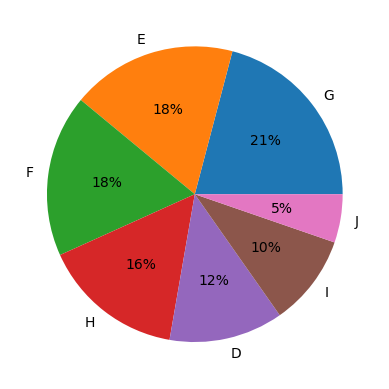

In [527]:
color_analysis = categorical.color.value_counts()
plt.pie(color_analysis, labels=color_analysis.index, autopct='%1.0f%%')

([<matplotlib.patches.Wedge at 0x7f890b132760>,
 [Text(1.015739568659854, 0.42222402662412956, 'Surat'),
  Text(0.4191853029288589, 1.0169973853498546, 'Antwerp'),
  Text(-0.4155497536439586, 1.018488292640836, 'Kimberly'),
  Text(-0.9112002873651004, 0.6162094094589587, 'Luxembourg'),
  Text(-1.079907901291512, 0.20928192642500726, 'Las Vegas'),
  Text(-1.075784436914388, -0.22953833077025101, 'New York City'),
  Text(-0.9016670533295394, -0.6300766024381684, 'Dubai'),
  Text(-0.5887313575225505, -0.9291907170595577, 'Madrid'),
  Text(-0.18722624663386428, -1.0839494142123955, 'Paris'),
  Text(0.2400117532115135, -1.0734963243161737, 'Tel Aviv'),
  Text(0.6287105005143265, -0.9026201341334156, 'Zurich'),
  Text(0.922805042367942, -0.5986909501406387, 'Amsterdam'),
  Text(1.0799403880120566, -0.209114223190028, 'London')],
 [Text(0.5540397647235568, 0.23030401452225246, '13%'),
  Text(0.22864652887028666, 0.5547258465544661, '12%'),
  Text(-0.22666350198761373, 0.5555390687131833, '12%

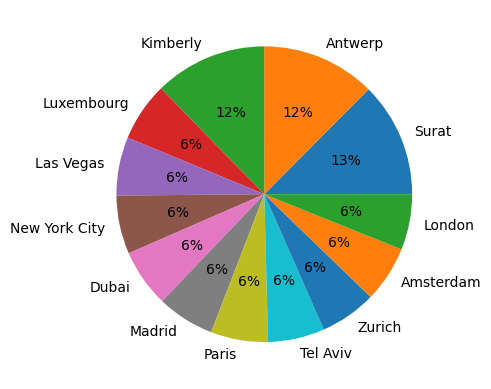

In [528]:
city_analysis = categorical.city.value_counts()
plt.pie(city_analysis, labels=city_analysis.index, autopct='%1.0f%%')

([<matplotlib.patches.Wedge at 0x7f893a337550>,
 [Text(0.7995343289135998, 0.7554765760026446, 'SI1'),
  Text(-0.675745773827718, 0.8679675392282702, 'VS2'),
  Text(-1.0344484171107402, -0.37405410348916707, 'SI2'),
  Text(-0.234339594575436, -1.0747487866539884, 'VS1'),
  Text(0.5762681592561927, -0.9369711887926327, 'VVS2'),
  Text(0.9605766807499043, -0.535996679466857, 'VVS1'),
  Text(1.0801024772623835, -0.20827539127718028, 'IF'),
  Text(1.0989488522614073, -0.04807723071617254, 'I1')],
 [Text(0.43610963395287256, 0.41207813236507884, '24%'),
  Text(-0.368588603906028, 0.47343683957905636, '23%'),
  Text(-0.5642445911513128, -0.2040295109940911, '17%'),
  Text(-0.12782159704114687, -0.5862266109021754, '15%'),
  Text(0.3143280868670142, -0.5110751938868906, '9%'),
  Text(0.523950916772675, -0.29236182516374015, '7%'),
  Text(0.5891468057794819, -0.11360475887846196, '3%'),
  Text(0.5994266466880402, -0.0262239440270032, '1%')])

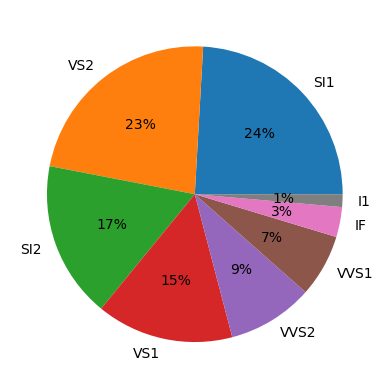

In [555]:
clarity_analysis = categorical.clarity.value_counts()
plt.pie(clarity_analysis, labels=clarity_analysis.index, autopct='%1.0f%%')

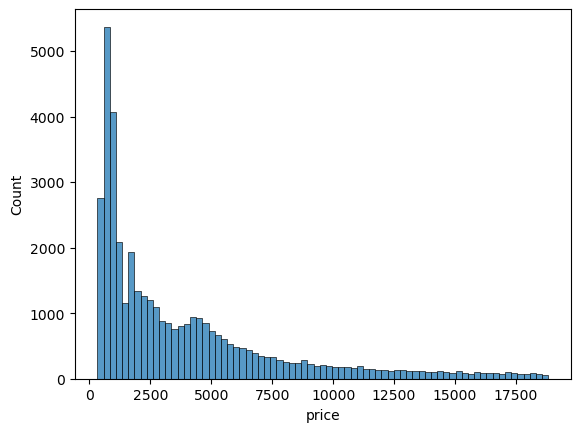

In [529]:
sns.histplot(x=numerical["price"]);

<Axes: xlabel='color', ylabel='price'>

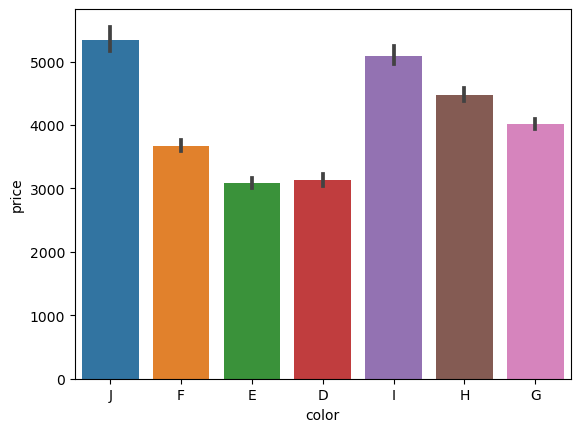

In [531]:
sns.barplot(data=tabla_final, x="color", y="price")

In [532]:
##Vemos que el color E(marrón) tiene el precio más alto, mayor que 8.000€. 
##Los colores I (morado) y G (azul) son los siguientes con los precios más altos

<Axes: xlabel='cut', ylabel='price'>

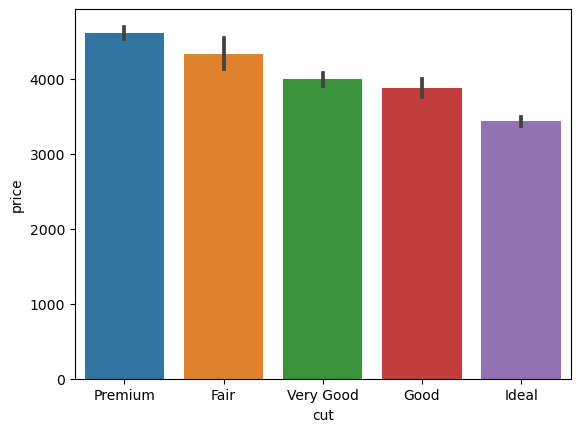

In [533]:
sns.barplot(data=tabla_final, x="cut", y="price")

In [534]:
##Fair cut es el que tiene el precio más alto, seguido por Very good.
##Premium tiene uno de los precios más bajos, por lo que es importante analizar esto y ver que correlación hay

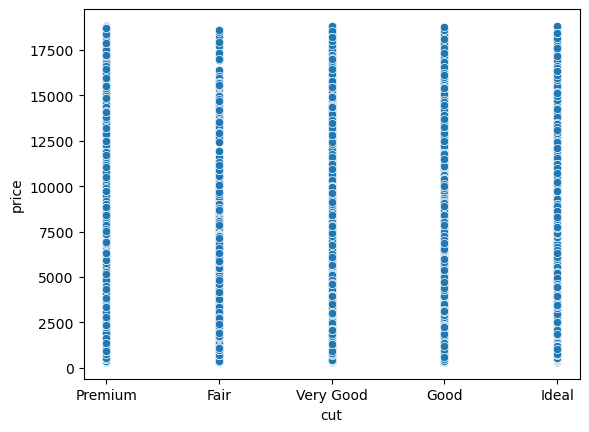

In [535]:
sns.scatterplot(x=tabla_final.cut, y=tabla_final.price);

In [536]:
##No hay correlación (o hay muy poca) entre el precio y el cut

<Axes: xlabel='clarity', ylabel='price'>

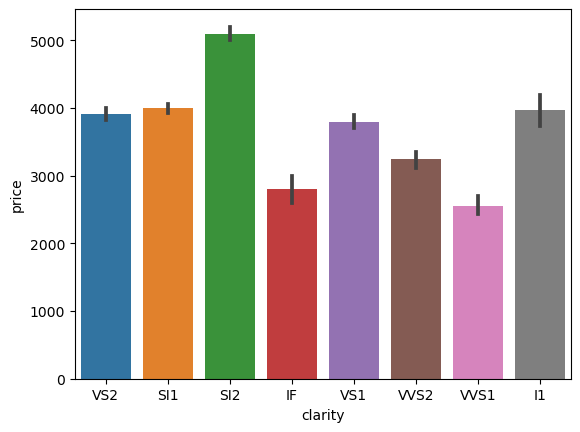

In [537]:
sns.barplot(data=tabla_final, x="clarity", y="price")

In [538]:
##Il y VS2 son las que tienen precios más altos. WS2 e IF tienen los precios más bajos

<Axes: xlabel='carat', ylabel='price'>

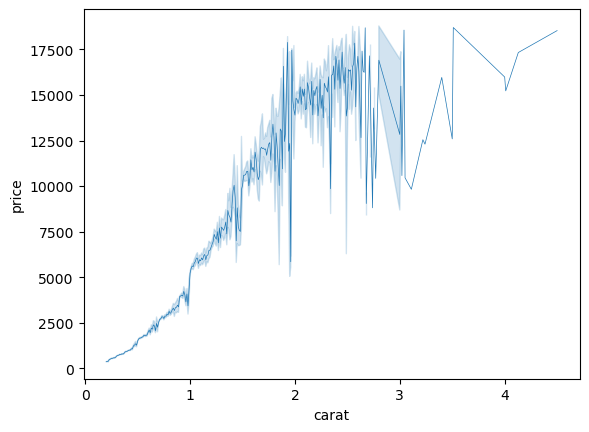

In [539]:
sns.lineplot(data=tabla_final, x="carat", y="price", linewidth=0.5)

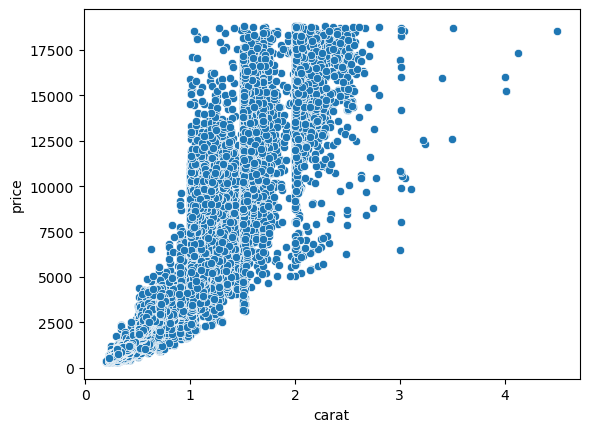

In [540]:
sns.scatterplot(x=tabla_final.carat, y=tabla_final.price);

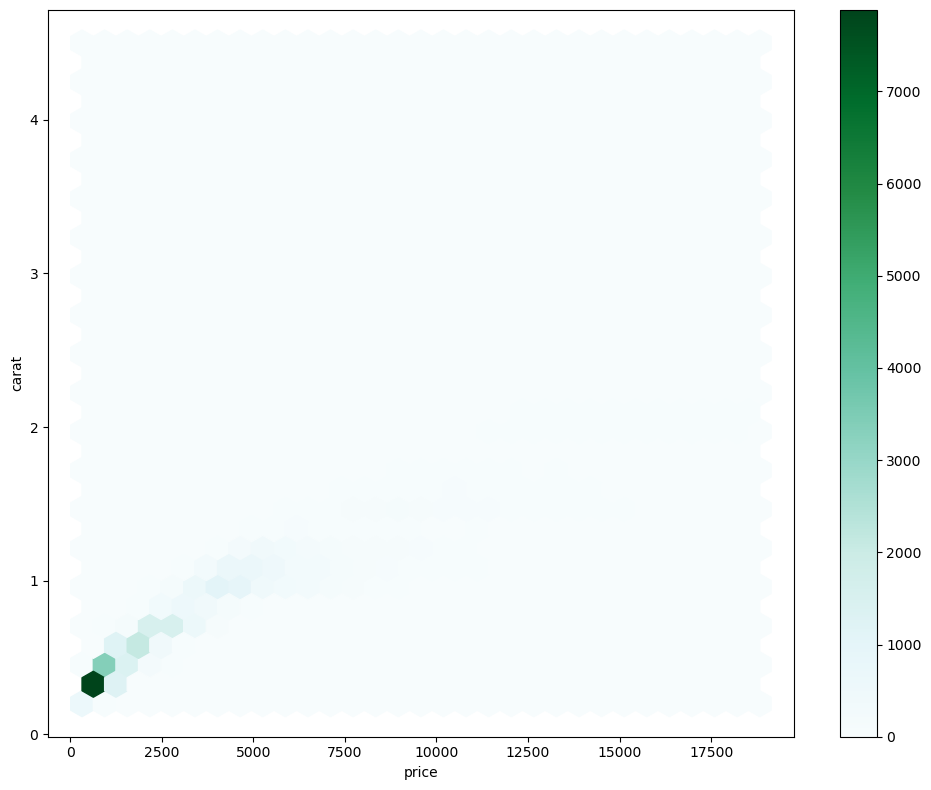

In [557]:
x = tabla_final.plot.hexbin(x='price',
                         y='carat',
                         gridsize=30,
                         sharex=False,     
                         figsize=(10, 8))
x.set_xlabel('price')
x.set_ylabel('carat')
plt.tight_layout()

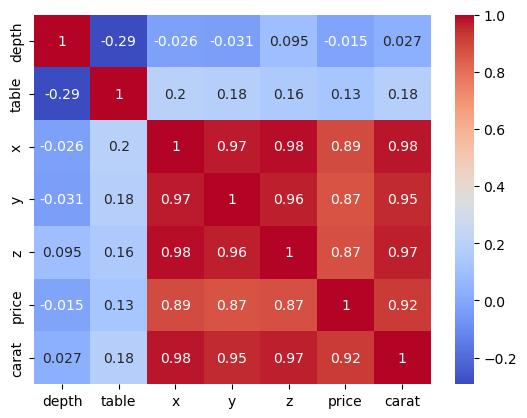

In [560]:
corr = tabla_final.select_dtypes(include='number').corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In [559]:
help(tabla_final.corr)

Help on method corr in module pandas.core.frame:

corr(method: 'str | Callable[[np.ndarray, np.ndarray], float]' = 'pearson', min_periods: 'int' = 1) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Compute pairwise correlation of columns, excluding NA/null values.
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        Method of correlation:
    
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float. Note that the returned matrix from corr
            will have 1 along the diagonals and will be symmetric
            regardless of the callable's behavior.
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result. Currently only available for Pearson
        and S